### Extracting the Dataset zipfile 

In [8]:
from zipfile import ZipFile
# from PIL import Image
path = "/content/drive/MyDrive/Colab Notebooks/datasets/face expression recognition dataset.zip"

with ZipFile(path) as f:
  f.extractall("./data")
  print("Data extracted")

Data extracted


### Importing the required modules

In [30]:
from tensorflow import keras
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers

### load the model

In [29]:
model =  tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/datasets/face_exp_rec_model.h5")

### creating the class names from the files folder to print the predicted output is related to which class

In [21]:
classes = [
    "angry",
    "fear",
    "happy",
    "neutral",
    "sad",
    "surprise"
]

### model summary

In [22]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 48, 48, 18)        468       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 24, 24, 18)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 24, 24, 18)        2934      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 12, 12, 18)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 12, 12, 36)        5868      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 6, 6, 36)       

### Predicting the model with accuracy

In [81]:
def Pred(img):
    img = Image.open(img)
    img = img.resize((48,48))
    test = tf.reshape(tf.constant(np.array(img)/255,dtype=tf.float32), (-1,48,48,1))
    preds = model.predict(test,verbose = False)[0]*100
    # print(preds)
    preds = tf.math.round(preds)
    confidence = tf.reduce_max(preds)

    index = int(tf.where(preds == confidence)[0][0])
    pred = classes[index]
    return f"{pred.title()} {int(confidence)}%"

### Prediction for Happy Expression

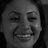

In [79]:
img = Image.open("/content/data/archive(2)/images/validation/happy/10106.jpg")
img

In [82]:
Pred("/content/data/archive(2)/images/validation/happy/10106.jpg")

'Happy 100%'

### Prediction for Angry Expression

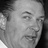

In [77]:
img = Image.open("/content/data/archive(2)/images/validation/angry/10336.jpg")
img

In [59]:
Pred("/content/data/archive(2)/images/validation/angry/10336.jpg")

'Angry 100%'

### Prediction for fear Expression

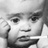

In [83]:
img = Image.open("/content/data/archive(2)/images/validation/fear/10437.jpg")
img

In [69]:
Pred("/content/data/archive(2)/images/validation/fear/10437.jpg")

'Fear 100%'

### Prediction for neutral Expression

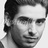

In [84]:
img = Image.open("/content/data/archive(2)/images/validation/neutral/10247.jpg")
img

In [85]:
Pred("/content/data/archive(2)/images/validation/neutral/10247.jpg")

'Neutral 99%'

### Prediction for sad Expression

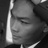

In [86]:
img = Image.open("/content/data/archive(2)/images/validation/sad/1026.jpg")
img

In [71]:
Pred("/content/data/archive(2)/images/validation/sad/1026.jpg")

'Sad 100%'

### Prediction for surprise Expression

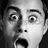

In [87]:
img = Image.open("/content/data/archive(2)/images/validation/surprise/10701.jpg")
img

In [88]:
Pred("/content/data/archive(2)/images/validation/surprise/10701.jpg")

'Surprise 100%'